# Phase 1: Exploratory Data Analysis (EDA)
# NASA Turbofan Engine Degradation Dataset

**Objective:** Understand the dataset, identify patterns, and plan feature engineering

**Goals:**
- Load and explore the dataset structure
- Analyze sensor behavior over engine lifecycle
- Identify degradation patterns
- Determine most predictive sensors
- Plan feature engineering strategy

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Configure plot sizes
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 1. Load Dataset

Dataset: `turbofan_ed_dataset/train_FD001.txt`

**Columns:**
- `unit_id`: Engine ID (1-100)
- `cycle`: Time in cycles
- `op_setting_1`, `op_setting_2`, `op_setting_3`: Operational settings
- `sensor_1` to `sensor_21`: Sensor measurements

In [16]:
# Define column names
columns = ['unit_id', 'cycle'] + \
          [f'op_setting_{i}' for i in range(1, 4)] + \
          [f'sensor_{i}' for i in range(1, 22)]

# Load training data
data_path = Path('../turbofan_ed_dataset/train_FD001.txt')
df = pd.read_csv(data_path, sep='\s+', header=None, names=columns)

print(f"Dataset shape: {df.shape}")
print(f"Number of engines: {df['unit_id'].nunique()}")
print(f"Total cycles: {df['cycle'].max()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (20631, 26)
Number of engines: 100
Total cycles: 362

First few rows:


,unit_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [17]:
# Basic statistics
df.describe()

,unit_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,0.885092,0.070985,22.082880,0.0,0.267087,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [18]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])

if missing.sum() == 0:
    print("\n✅ No missing values!")

Missing values per column:
Series([], dtype: int64)

✅ No missing values!


## 2. Calculate RUL (Remaining Useful Life)

RUL = Number of cycles until failure for each engine

In [19]:
# Calculate RUL for each engine
# RUL = max_cycle - current_cycle
df['RUL'] = df.groupby('unit_id')['cycle'].transform('max') - df['cycle']

print("RUL distribution:")
print(df['RUL'].describe())

# Create binary failure label (failure in next 30 cycles)
df['failure_soon'] = (df['RUL'] <= 30).astype(int)

print(f"\nClass distribution:")
print(f"Normal operation: {(df['failure_soon'] == 0).sum()} samples")
print(f"Failure imminent: {(df['failure_soon'] == 1).sum()} samples")
print(f"Imbalance ratio: {(df['failure_soon'] == 0).sum() / (df['failure_soon'] == 1).sum():.2f}:1")

RUL distribution:
count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name: RUL, dtype: float64

Class distribution:
Normal operation: 17531 samples
Failure imminent: 3100 samples
Imbalance ratio: 5.66:1


## 3. Visualize Engine Lifecycle

Plot sensor behavior over time for a few sample engines

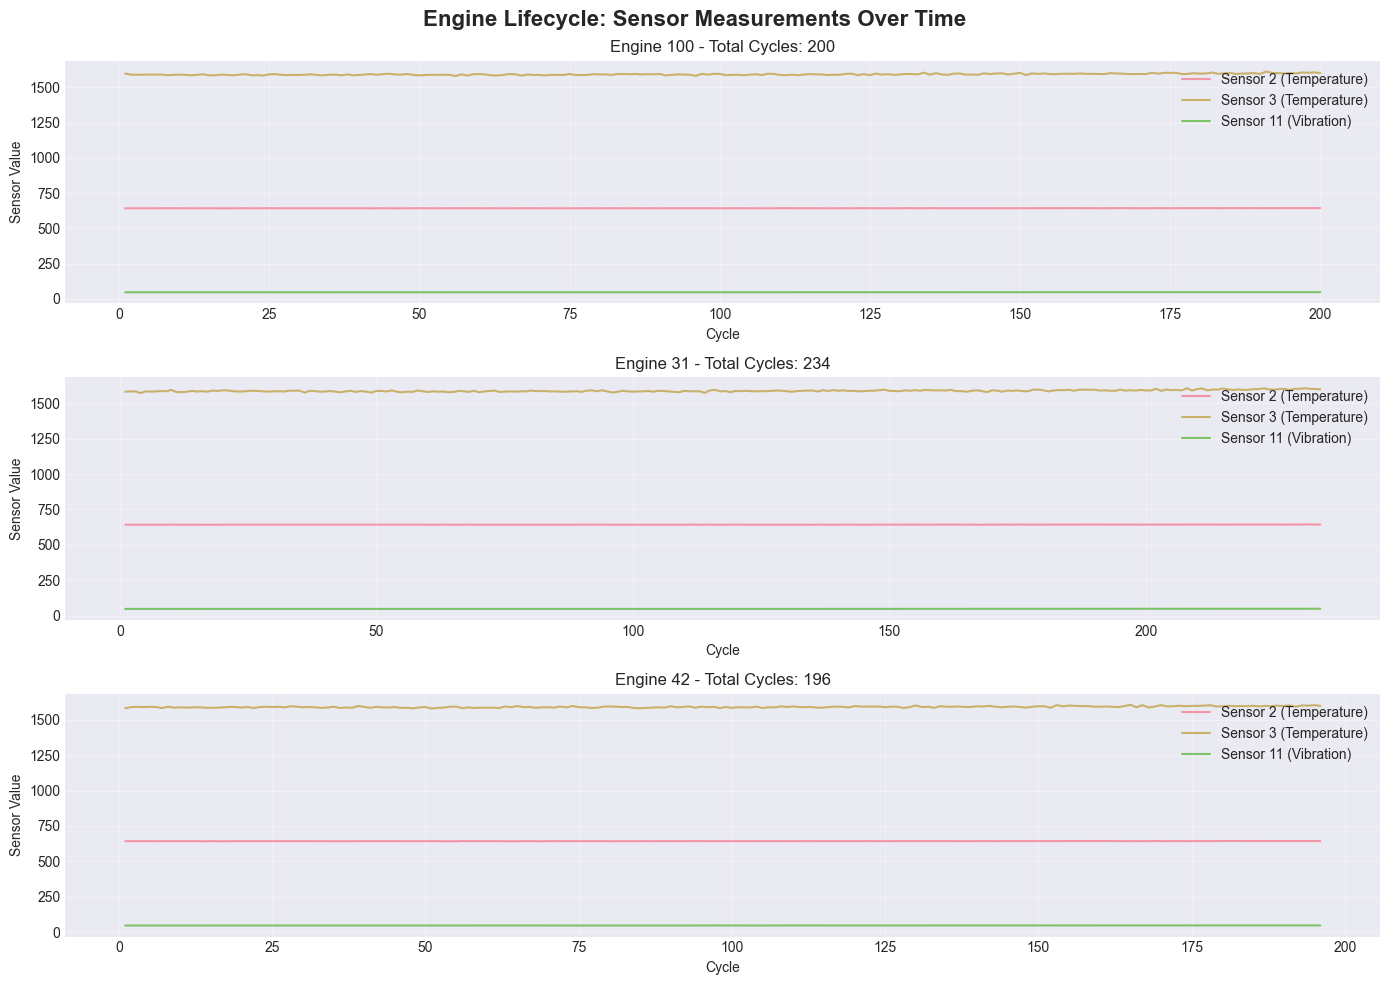

In [20]:
# Select 3 random engines
sample_engines = np.random.choice(df['unit_id'].unique(), 3, replace=False)

fig, axes = plt.subplots(3, 1, figsize=(14, 10))
fig.suptitle('Engine Lifecycle: Sensor Measurements Over Time', fontsize=16, fontweight='bold')

for idx, engine_id in enumerate(sample_engines):
    engine_data = df[df['unit_id'] == engine_id]
    
    # Plot a few key sensors
    axes[idx].plot(engine_data['cycle'], engine_data['sensor_2'], label='Sensor 2 (Temperature)', alpha=0.7)
    axes[idx].plot(engine_data['cycle'], engine_data['sensor_3'], label='Sensor 3 (Temperature)', alpha=0.7)
    axes[idx].plot(engine_data['cycle'], engine_data['sensor_11'], label='Sensor 11 (Vibration)', alpha=0.7)
    axes[idx].set_title(f'Engine {engine_id} - Total Cycles: {engine_data["cycle"].max()}')
    axes[idx].set_xlabel('Cycle')
    axes[idx].set_ylabel('Sensor Value')
    axes[idx].legend(loc='best')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Sensor Variability Analysis

Identify which sensors show significant variation (useful for prediction)

Coefficient of Variation (higher = more informative):
sensor_4     6.388238e-03
sensor_11    5.618023e-03
sensor_20    4.656460e-03
sensor_21    4.648014e-03
sensor_15    4.442595e-03
sensor_17    3.938762e-03
sensor_3     3.854801e-03
sensor_9     2.435994e-03
sensor_14    2.342431e-03
sensor_7     1.599465e-03
sensor_12    1.414527e-03
sensor_2     7.780739e-04
sensor_6     6.427569e-05
sensor_13    3.011559e-05
sensor_8     2.972471e-05
sensor_16    4.626041e-16
sensor_5     1.215048e-16
sensor_18    0.000000e+00
sensor_19    0.000000e+00
sensor_10    0.000000e+00
sensor_1     0.000000e+00
dtype: float64


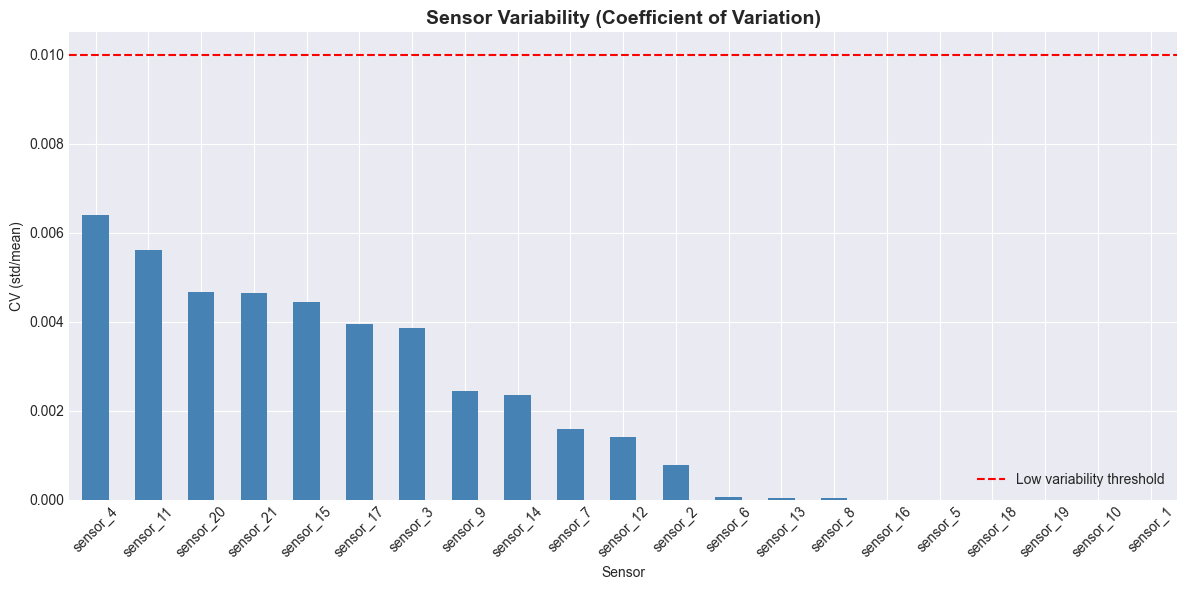


Sensors with low variability (can be removed): ['sensor_4', 'sensor_11', 'sensor_20', 'sensor_21', 'sensor_15', 'sensor_17', 'sensor_3', 'sensor_9', 'sensor_14', 'sensor_7', 'sensor_12', 'sensor_2', 'sensor_6', 'sensor_13', 'sensor_8', 'sensor_16', 'sensor_5', 'sensor_18', 'sensor_19', 'sensor_10', 'sensor_1']


In [21]:
# Calculate coefficient of variation for each sensor
sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
cv = df[sensor_cols].std() / df[sensor_cols].mean()
cv = cv.sort_values(ascending=False)

print("Coefficient of Variation (higher = more informative):")
print(cv)

# Plot
plt.figure(figsize=(12, 6))
cv.plot(kind='bar', color='steelblue')
plt.title('Sensor Variability (Coefficient of Variation)', fontsize=14, fontweight='bold')
plt.xlabel('Sensor')
plt.ylabel('CV (std/mean)')
plt.axhline(y=0.01, color='r', linestyle='--', label='Low variability threshold')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identify constant sensors (can be removed)
constant_sensors = cv[cv < 0.01].index.tolist()
print(f"\nSensors with low variability (can be removed): {constant_sensors}")

## 5. Correlation Analysis

Find which sensors correlate with RUL (remaining useful life)

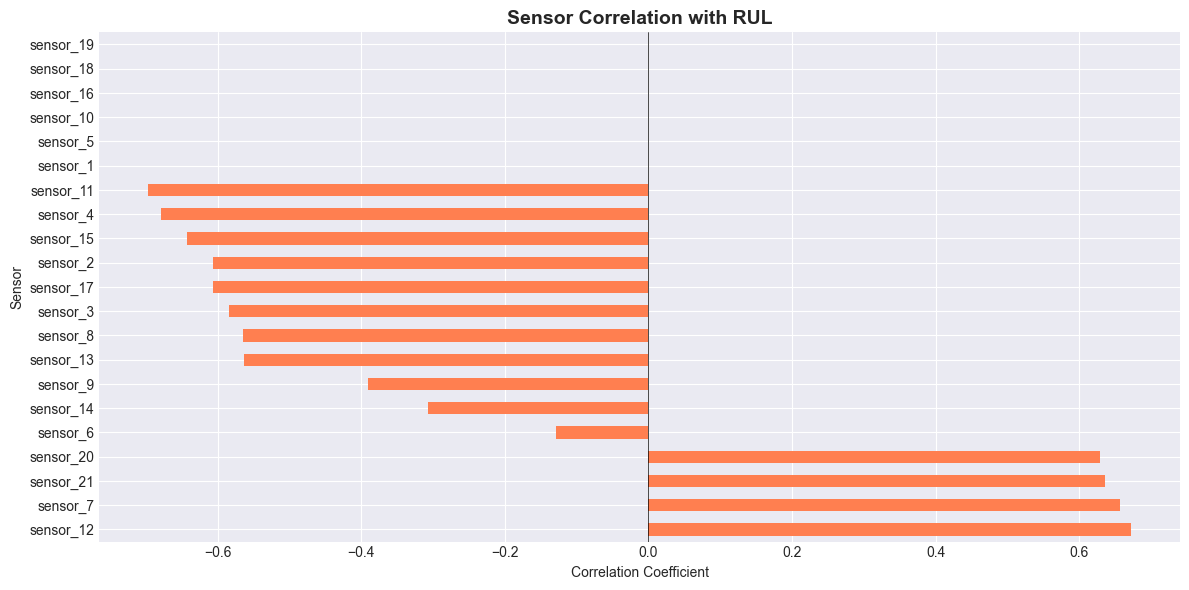


Top 10 sensors correlated with RUL:
sensor_11    0.696228
sensor_4     0.678948
sensor_12    0.671983
sensor_7     0.657223
sensor_15    0.642667
sensor_21    0.635662
sensor_20    0.629428
sensor_2     0.606484
sensor_17    0.606154
sensor_3     0.584520
Name: RUL, dtype: float64


In [22]:
# Correlation with RUL
correlations = df[sensor_cols + ['RUL']].corr()['RUL'].drop('RUL').sort_values(ascending=False)

plt.figure(figsize=(12, 6))
correlations.plot(kind='barh', color='coral')
plt.title('Sensor Correlation with RUL', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Sensor')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

print("\nTop 10 sensors correlated with RUL:")
print(correlations.abs().sort_values(ascending=False).head(10))

## 6. Degradation Patterns

Visualize how sensors change as engines approach failure

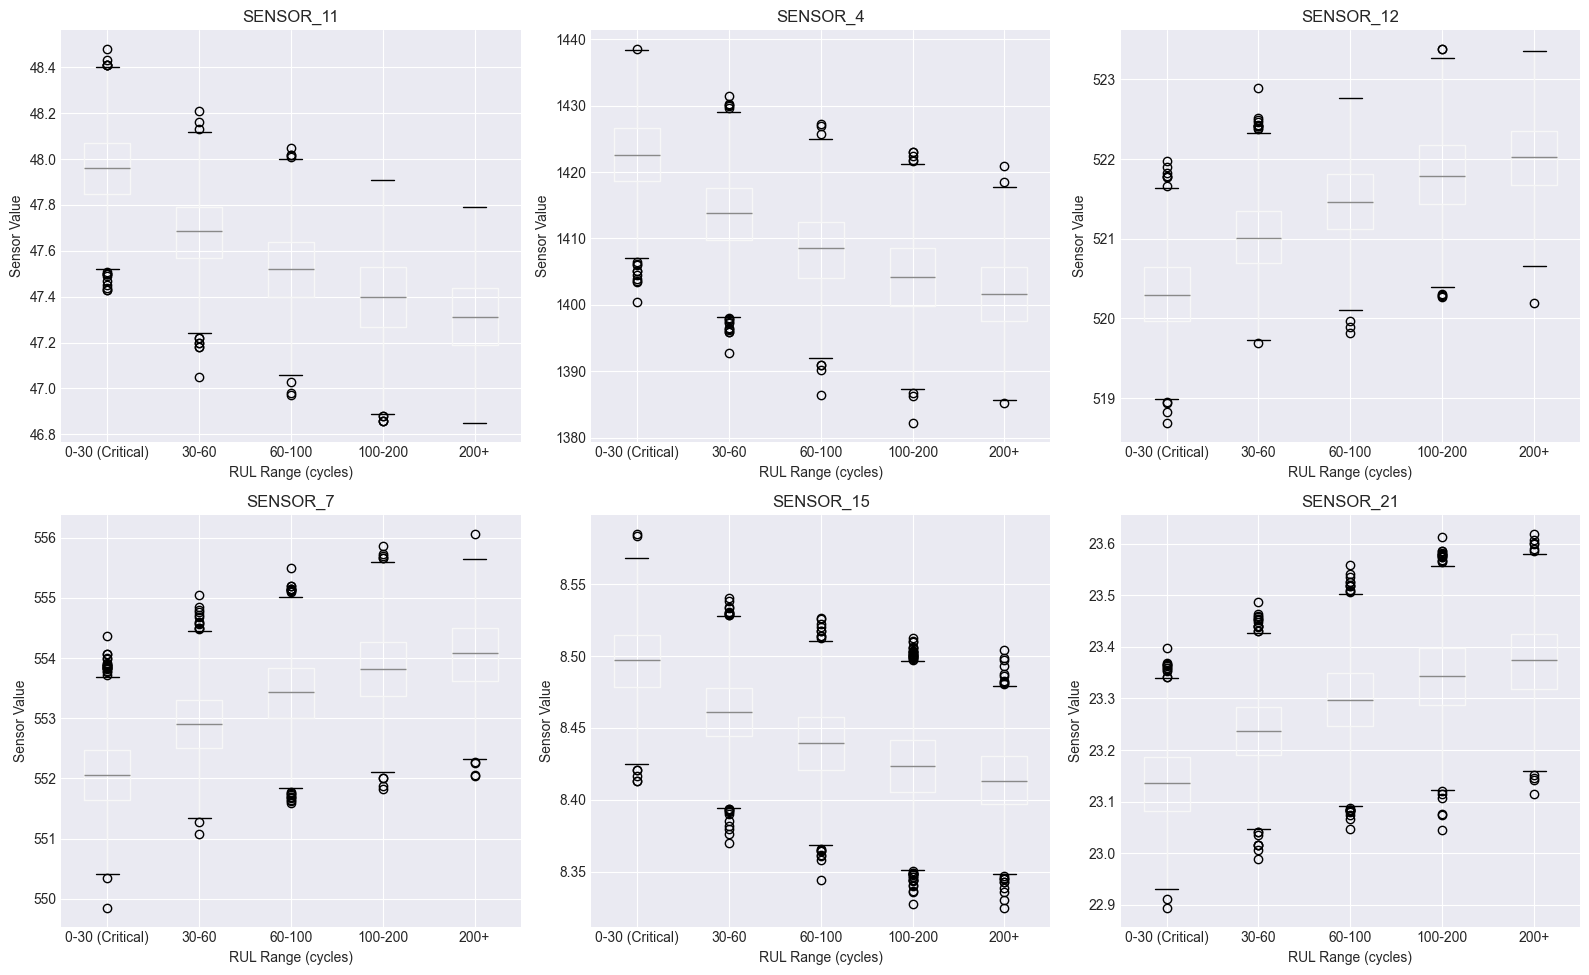

In [23]:
# Group by RUL bins
df['RUL_bin'] = pd.cut(df['RUL'], bins=[0, 30, 60, 100, 200, 1000], 
                       labels=['0-30 (Critical)', '30-60', '60-100', '100-200', '200+'])

# Plot top 6 sensors
top_sensors = correlations.abs().sort_values(ascending=False).head(6).index

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Sensor Behavior by Remaining Useful Life', fontsize=16, fontweight='bold')

for idx, sensor in enumerate(top_sensors):
    ax = axes[idx // 3, idx % 3]
    df.boxplot(column=sensor, by='RUL_bin', ax=ax)
    ax.set_title(f'{sensor.upper()}')
    ax.set_xlabel('RUL Range (cycles)')
    ax.set_ylabel('Sensor Value')
    ax.get_figure().suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

## 7. Key Findings & Next Steps

Summarize insights and plan Phase 2

In [24]:
print("="*60)
print("KEY FINDINGS FROM EDA")
print("="*60)
print(f"\n1. Dataset Size: {df.shape[0]} samples, {len(df['unit_id'].unique())} engines")
print(f"\n2. Class Imbalance: {(df['failure_soon'] == 0).sum() / (df['failure_soon'] == 1).sum():.1f}:1")
print("   → Need: SMOTE, class weights, or focal loss")

print(f"\n3. Low-Variance Sensors to Remove: {len(constant_sensors)}")
print(f"   {constant_sensors}")

print(f"\n4. Most Predictive Sensors (top 5):")
for sensor in correlations.abs().sort_values(ascending=False).head(5).index:
    print(f"   - {sensor}: {correlations[sensor]:.3f} correlation with RUL")

print("\n5. Degradation Patterns:")
print("   - Clear trend: sensor values change as RUL decreases")
print("   - Non-linear relationships suggest need for ensemble models")

print("\n" + "="*60)
print("NEXT STEPS (Phase 2 - Feature Engineering)")
print("="*60)
print("\n✅ Create rolling statistics (mean, std, max) for top sensors")
print("✅ Generate lag features (previous cycle values)")
print("✅ Calculate rate of change (degradation velocity)")
print("✅ Engineer domain features (stress indicators, anomaly flags)")
print("✅ Target: 30-50 features for baseline model")
print("\n📁 Save: notebooks/02_feature_engineering.ipynb")

KEY FINDINGS FROM EDA

1. Dataset Size: 20631 samples, 100 engines

2. Class Imbalance: 5.7:1
   → Need: SMOTE, class weights, or focal loss

3. Low-Variance Sensors to Remove: 21
   ['sensor_4', 'sensor_11', 'sensor_20', 'sensor_21', 'sensor_15', 'sensor_17', 'sensor_3', 'sensor_9', 'sensor_14', 'sensor_7', 'sensor_12', 'sensor_2', 'sensor_6', 'sensor_13', 'sensor_8', 'sensor_16', 'sensor_5', 'sensor_18', 'sensor_19', 'sensor_10', 'sensor_1']

4. Most Predictive Sensors (top 5):
   - sensor_11: -0.696 correlation with RUL
   - sensor_4: -0.679 correlation with RUL
   - sensor_12: 0.672 correlation with RUL
   - sensor_7: 0.657 correlation with RUL
   - sensor_15: -0.643 correlation with RUL

5. Degradation Patterns:
   - Clear trend: sensor values change as RUL decreases
   - Non-linear relationships suggest need for ensemble models

NEXT STEPS (Phase 2 - Feature Engineering)

✅ Create rolling statistics (mean, std, max) for top sensors
✅ Generate lag features (previous cycle values)


In [25]:
# Save key findings for next notebook
findings = {
    'top_sensors': correlations.abs().sort_values(ascending=False).head(10).index.tolist(),
    'constant_sensors': constant_sensors,
    'class_imbalance_ratio': (df['failure_soon'] == 0).sum() / (df['failure_soon'] == 1).sum(),
    'total_samples': len(df),
    'num_engines': df['unit_id'].nunique()
}

import json
with open('../data/processed/eda_findings.json', 'w') as f:
    json.dump(findings, f, indent=2)

print("✅ Findings saved to data/processed/eda_findings.json")

✅ Findings saved to data/processed/eda_findings.json
